In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tbl = pd.read_csv("2017_jun_final.csv")

In [3]:
tbl.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [4]:
tbl.shape

(8704, 25)

In [5]:
tbl.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [6]:
tbl.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [7]:
tbl = tbl.drop(["Специализация", "Университет", "Предметная.область", "Валюта", "cls"], axis=1)

In [8]:
tbl.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [9]:
tbl.dropna(inplace=True)

In [10]:
tbl.shape

(4854, 20)

In [11]:
python_data = tbl[tbl["Язык.программирования"] == 'Python']

In [12]:
python_data.shape

(207, 20)

In [13]:
grouped_data = python_data.groupby(["Должность"])

In [14]:
pd.DataFrame(grouped_data.agg({"Зарплата.в.месяц": ["max", "min"]}))

Зарплата.в.месяц      
                                      max   min
Должность                                      
Junior Software Engineer             1250   100
Senior Software Engineer             9200  1300
Software Engineer                    5400   500
System Architect                     5000  3000
Technical Lead                       6200  1425

In [15]:
def fill_avg_salary(data):
    avg_row = []
    mean = grouped_data["Зарплата.в.месяц"].mean()
    avg_row.append(mean[data["Должность"]])
    return pd.Series(avg_row)

In [16]:
avg = python_data.apply(fill_avg_salary, axis=1)

In [17]:
python_data["avg"] = avg

C:\Users\Deic\AppData\Local\Temp\ipykernel_5252\4282463263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  python_data["avg"] = avg


In [18]:
python_data["avg"].describe()

count     207.000000
mean     1753.937198
std       996.562606
min       560.841270
25%       560.841270
50%      1799.070000
75%      1799.070000
max      4000.000000
Name: avg, dtype: float64

In [19]:
python_data.to_csv("python_data.csv", index=False)

In [21]:
python_data.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,...,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary,avg
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,...,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,1799.07000
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,...,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,1799.07000
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,...,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,560.84127
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,...,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,560.84127
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,...,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,560.84127


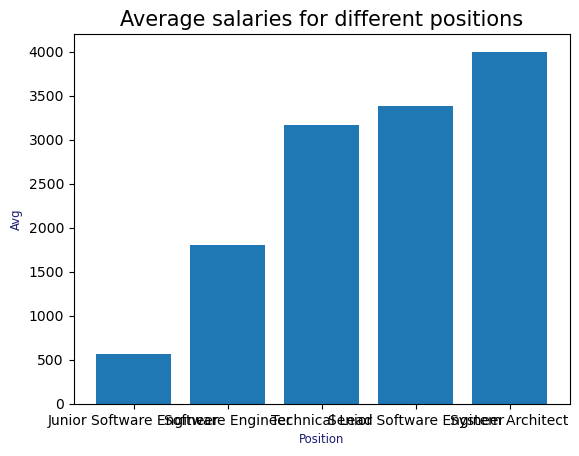

In [39]:
python_data_s = python_data.sort_values("avg")

plt.bar(
    python_data_s["Должность"],
    python_data_s["avg"]
)

plt.xlabel("Position", fontsize="small", color="midnightblue")
plt.ylabel("Avg", fontsize="small", color="midnightblue")
plt.title("Average salaries for different positions", fontsize=15)
plt.show()

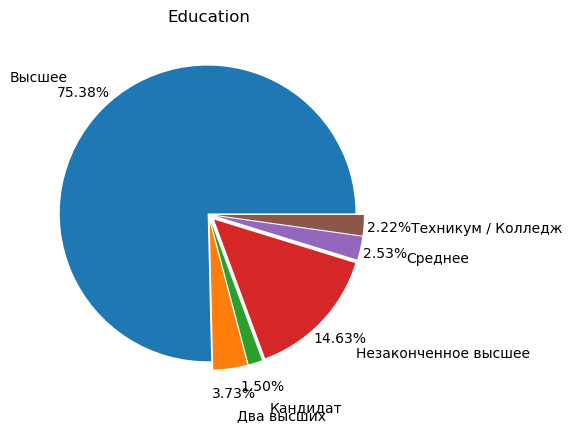

In [86]:
tbl_education = tbl.groupby(["Образование"])
tbl_education = tbl_education.agg({"Образование": "count"})

tbl_education.columns = ["count"]

labels = tbl_education.index
data = tbl_education["count"]
explode = [0.01, 0.05, 0.05, 0.05, 0.05, 0.05]

plt.pie(
    data,
    labels=labels,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.17,
    labeldistance=1.32,
)
plt.title("Education")

plt.show()

In [88]:
sns.set_style("whitegrid")

<Axes: xlabel='exp', ylabel='salary'>

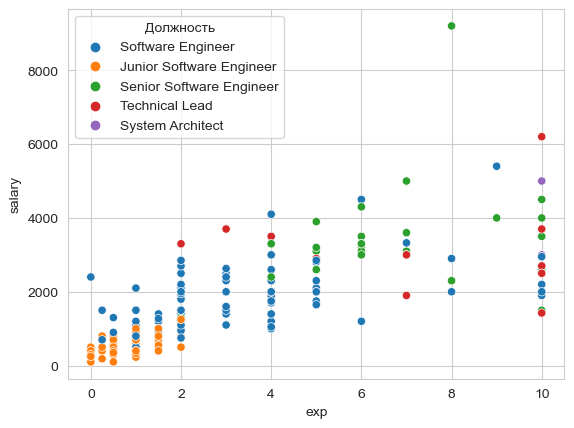

In [91]:
sns.scatterplot(x='exp', y='salary', hue='Должность', data=python_data)